# Hands-on 03: Visualização de sinais na frequência (gerando e vendo o espectro de um sinal)

# Objetivos
As metas desse tutorial são ajudar o usuário a:
- Fazer uma breve revisão sobre amostragem e a consequência de seu valor na resconstrução de um sinal amostrado;
- Visualização do conteúdo em frequência (_single_ e _double sided_) de um sinal;
- Visualizar conteúdo espectral de sinais de áudio.

# Prática 1: Influência da taxa de amostragem na geração de um sinal no tempo

**Passo 1:** Abra um script no Spyder, salve-o como **handson3_1.py** e escreva o seguinte código:

#### Observação:
Antes de executar, remova a última linha:
```ipython
%whos
```
Esta não é uma função do Python, e sim um comando específico do IPython. Desse modo, só funciona nos notebooks ou no Console IPython embutido no Spyder. Comandos desse tipo são conhecidos como _magic function_, e acrescentam funcionalidades interessantes aos códigos Python. Para saber mais sobre as _magics_, acesse  a [documentação](https://ipython.org/ipython-doc/3/interactive/tutorial.html). 

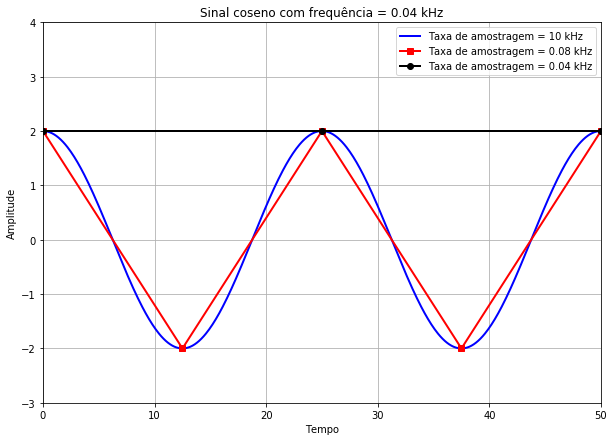

Variable    Type       Data/Info
--------------------------------
Am          int        2
fm          float      0.04
fsampling   float      0.04
m           ndarray    2001: 2001 elems, type `float64`, 16008 bytes
m2          ndarray    17: 17 elems, type `float64`, 136 bytes
m3          ndarray    9: 9 elems, type `float64`, 72 bytes
np          module     <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
plt         module     <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
t           ndarray    2001: 2001 elems, type `float64`, 16008 bytes
t2          ndarray    17: 17 elems, type `float64`, 136 bytes
t3          ndarray    9: 9 elems, type `float64`, 72 bytes
tf          int        200


In [14]:
#Importando as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt


## Geração do sinal cosenoidal
fsampling = 10                                     # Taxa de amostragem  (kHz)
tf = 200                                           # Tempo final 
t = np.arange(0,tf+1/fsampling,1/fsampling)        # Vetor tempo discreto, obedecendo o tempo de amostragem
fm = 0.04                                          # Frequência do sinal senoidal
Am = 2                                             # Amplitude do sinal senoidal
m = Am*np.cos(2*np.pi*fm*t)                        # Geração de amostras do sinal senoidal

plt.figure(figsize=(10,7))                         # Configura o tamanho da figura

plt.plot(t,m,'b',linewidth=2)                      # Plota gráfico do coseno com taxa de amostragem fsampling
plt.xlabel('Tempo')                                # Definição do texto do eixo X
plt.ylabel('Amplitude')                            # Definição do texto do eixo Y 
plt.grid()                                         # Desenhar o grid do gráfico                           

## Gráfico do coseno com nova taxa de amostragem = 0.08 (o dobro da banda do sinal)
fsampling = 0.08                                   # Taxa de amostragem (kHz)
t2 = np.arange(0,tf+1/fsampling,1/fsampling)       # Geração de amostras do sinal m(t) com nova taxa de amostragem
m2 = Am*np.cos(2*np.pi*fm*t2)                      # Geração de amostras do sinal m(t) com nova taxa de amostragem    
plt.plot(t2,m2,'r-s',linewidth=2)                  # Plota com nova taxa de amostragem (linha com marcador quadrado) 

## Gráfico do coseno com nova taxa de amostragem = 0.04 (igual a banda do sinal)
fsampling = 0.04                                   # Taxa de amostragem (kHz)
t3 = np.arange(0,tf+1/fsampling,1/fsampling)       # Geração de amostras do sinal m(t) com nova taxa de amostragem
m3 = Am*np.cos(2*np.pi*fm*t3)                      # Geração de amostras do sinal m(t) com nova taxa de amostragem
plt.plot(t3,m3,'k-o',linewidth=2)                  # Plota com nova taxa de amostragem (linha com marcador circular) 
plt.legend(['Taxa de amostragem = 10 kHz',         # Adiciona legenda ao gráfico
'Taxa de amostragem = 0.08 kHz',
'Taxa de amostragem = 0.04 kHz'])                  
plt.title('Sinal coseno com frequência = 0.04 kHz')# Adiciona título ao gráfico

plt.axis([0,2*1/fm,-3,4])                          # Zoom em dois períodos da onda

plt.show()
# A função 'whos' é responsável por mostrar todas as variáveis que foram criadas no workspace,
# identificando suas principais caracteristicas.
%whos

#### Observação:
No começo do código, configuramos o tamanho da figura com a linha de código abaixo
```python
plt.figure(figsize=(10,7))                         # Configura o tamanho da figura
```
Esse comando cria uma instância da classe 'figure', que abriga o plot de uma ou mais linhas, suas legendas, cores, etc. Vale salientar que ela deve ser inserida no início de uma plotagem que se deseja fazer, para evitar problemas com múltiplas instâncias. Entenda que essa configuração de tamanho é opcional, com a finalidade de melhorar a visualização. 

**Passo 2:** Escreva um script trocando cosseno por seno e verifique o que acontece com as curvas.

**Passo 3:** Insira a linha de código explanada acima logo após o comando abaixo,
```python
plt.title('Sinal coseno com frequência = 0.04 kHz')# Adiciona título ao gráfico
```
execute o script e veja o resultado. Isso ocorre porque a instância de 'figure' foi feita depois de se configurar o plot (adicionar as linhas), portanto, existem duas figuras em questão. Uma detalhada anteriormente e uma vazia, com apenas duas características: limitação dos eixos (vide o comando plt.axis()) e tamanho 10x7 polegadas, e a função plt.show() irá exibir as duas. Esse teste pode ser realizado no próprio notebook, mas lembre-se de retornar a linha plt.figure()... para seu devido lugar.

**Passo 4:** Execute o comando %whos no console IPython embutido no Spyder. 

# Prática 2: Amplitude do espectro _single sided band_ (pendente)

Vamos praticar a construção da magnitude do espectro de um sinal cossenoidal, um tom, sem usar as funções prontas do Python. Usaremos a função **plt.stem($\cdot$)** ao invés da função **plt.plot($\cdot$)**, isso facilitará a visualização no eixo da frequência.

**Passo 1:** Abra o Spyder e digite no _Console IPython_ os seguinte comandos:

> ```python
import numpy.fft as fft  #importa o pacote 'fft' da biblioteca 'numpy'
edit fft                  
edit fft.fft
```

Isso abrirá os arquivos (na ordem):
- $__init__$.py : Arquivos com esse título servem para marcar um diretório no disco como um diretório de pacote do Python. Lembre que o interpretador irá procurar nos diretórios do disco pelo pacote que está sendo chamado, e diretórios com nomes especiais (numpy,matplotlib,etc...) poderiam ser confundidos com os diretórios próprios dessas bibliotecas. Para evitar esse problema, diretórios de pacote contém o script marcador $__init__$.py, que pode estar vazio, inclusive. 

- fftpack.py : Script contendo a definição das funções em comentários, bem como os seus respectivos códigos-fonte. O entendimento das definições pode ser um pouco sutil, dado que essas não são sempre intuitivas. 

Em Python, não existe 'código escondido'. Diz-se que uma função é _Built-in_ quando esta pode ser chamada sem importar uma biblioteca específica.

**Passo 2:** Antes de usar a função do Python, vamos implementar um algoritmo para a DFT utilizando sua definição. Abra um script no Spyder, salve-o como **handson3_2.py** e escreva o seguinte código (remova a linha %whos):

/home/labsim/anaconda3/envs/py34/lib/python3.4/site-packages/ipykernel/__main__.py:25: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


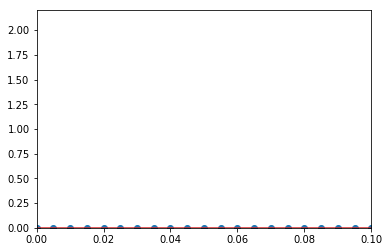

Variable    Type          Data/Info
-----------------------------------
Am          int           2
L           int           2000
N           int           2000
T           float         0.1
WN          complex128    (0.999995065202-0.00314158748588j)
WNnk        ndarray       2000: 2000 elems, type `complex128`, 32000 bytes
X           ndarray       2000: 2000 elems, type `complex128`, 32000 bytes
f           ndarray       1001: 1001 elems, type `float64`, 8008 bytes
fm          float         0.04
fsampling   int           10
k           ndarray       2000: 2000 elems, type `int64`, 16000 bytes
m           ndarray       2000: 2000 elems, type `float64`, 16000 bytes
m2          ndarray       17: 17 elems, type `float64`, 136 bytes
m3          ndarray       9: 9 elems, type `float64`, 72 bytes
n           ndarray       2000: 2000 elems, type `int64`, 16000 bytes
nn          ndarray       2000: 2000 elems, type `int64`, 16000 bytes
np          module        <module 'numpy' from '/ho<...

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import time
## Geração do sinal cosenoidal
fsampling = 10                                       # Taxa de amostragem
T =1/fsampling                                       # Tempo entre amostras
L = 2000                                             # Número de amostras
t = np.arange(0,(L-1)*T+1/fsampling,1/fsampling)     # Eixo do tempo
fm = 0.04                                            # Frequência da senoide
Am = 2                                               # Amplitude da senoide
m = Am*np.cos(2*np.pi*fm*t)                          # Sinal senoidal
t1=time.clock()                                      # Contador de tempo

## Montando a DFT
N=len(m)                                             # Comprimento do sinal m(t)
n=np.arange(0,N)                                     # Vetor n
k=np.arange(0,N)                                     # Vetor k
WN=np.exp(-1j*2*np.pi/N)                             # Cálculo de Wn = e^{-j2pi/N}
nn=np.transpose(n)*k                                              # Monta a Matriz DFT
WNnk=WN**nn                                          # Monta a Matriz DFT
X=m*WNnk/L                                           # Implementa o somatório da DFT via operação matricial    
f = fsampling/2*np.linspace(0,1,(L/2)+1)                # Monta o eixo das frequências
tempo_DFT=time.clock() - t1                                   # Conta tempo de execução até esse ponto do código
#disp(['Tempo da DFT = ' num2str(tempo_DFT) ' s'])    # Mostra tempo de execução
plt.stem(f,2*np.abs(X[0:L/2+1]))                            # Mostra gráfico do espectro 
plt.axis([ 0,0.1,0,2.2])                                 # Zoom para melhor visualização 
plt.show()
# A função 'whos' é responsável por mostrar todas as variáveis que foram criadas no workspace,
# identificando suas principais caracteristicas.
%whos